In [1]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras import Input, layers
from tensorflow.keras import models
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.lite.experimental.microfrontend.python.ops import audio_microfrontend_op as frontend_op
print(tf.__version__)
import numpy as np
import shutil, os
import matplotlib.pyplot as plt
import pathlib
import random
import sys
import io
import os
import glob
from datetime import datetime as dt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

%run functions.ipynb #pulling in functions from other file 

2.8.0


In [3]:
NUM_LABELS=2 #Binary classification so 2, [bird:0, unknown:1]
IMG_SIZE=96 #image resolution is 96x96 dictated by pico
EPOCHS=1000 #Number of epochs to train for
BATCH_SIZE = 64 #Batch for speed and regularization
INPUT_SHAPE= (IMG_SIZE,IMG_SIZE,1)
norm_layer = tf.keras.layers.Normalization(axis=-1)

In [4]:
#Getting training and validation data
validation_generator=val_gen('data/augmented')
train_generator=train_gen('data/augmented')                             

Found 509462 images belonging to 2 classes.
Found 509462 images belonging to 2 classes.


In [5]:
model = models.Sequential([
    layers.Input(shape=INPUT_SHAPE),
 #   norm_layer,
    
    
    
    layers.Conv2D(8, 3,2, activation='relu'),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),


                        
    layers.Conv2D(16, 3, activation='relu'),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4), 
    
    layers.Conv2D(32, 3, activation='relu'),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
    #layers.MaxPooling2D(pool_size=(2, 2)),

                        
    layers.Conv2D(16, 3, activation='relu'),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  #  layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(8, 3, activation='relu'),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),                   
    
    
    layers.Flatten(),

    layers.Dense(128, activation='softmax'),
    
    layers.Dense(NUM_LABELS),
], name="attempt_1")
model.summary()


Model: "attempt_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 8)         80        
                                                                 
 depthwise_conv2d (Depthwise  (None, 47, 47, 8)        80        
 Conv2D)                                                         
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 16)        1168      
                                                                 
 depthwise_conv2d_1 (Depthwi  (None, 45, 45, 16)       160       
 seConv2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                         

Steps: 256
Epoch 1/100
256/256 [==============================] - 78s 300ms/step - loss: 0.6732 - accuracy: 0.5770 - val_loss: 0.6282 - val_accuracy: 0.6766
Epoch 2/100
256/256 [==============================] - 70s 275ms/step - loss: 0.6016 - accuracy: 0.6969 - val_loss: 0.5836 - val_accuracy: 0.7085
Epoch 3/100
256/256 [==============================] - 68s 265ms/step - loss: 0.5571 - accuracy: 0.7284 - val_loss: 0.5246 - val_accuracy: 0.7578
Epoch 4/100
256/256 [==============================] - 65s 253ms/step - loss: 0.5190 - accuracy: 0.7526 - val_loss: 0.4817 - val_accuracy: 0.7817
Epoch 5/100
256/256 [==============================] - 62s 242ms/step - loss: 0.4848 - accuracy: 0.7735 - val_loss: 0.4562 - val_accuracy: 0.7906
Epoch 6/100
256/256 [==============================] - 59s 231ms/step - loss: 0.4567 - accuracy: 0.7878 - val_loss: 0.4437 - val_accuracy: 0.7971
Epoch 7/100
256/256 [==============================] - 57s 224ms/step - loss: 0.4402 - accuracy: 0.7983 - val_los

Epoch 57/100
256/256 [==============================] - 23s 90ms/step - loss: 0.2602 - accuracy: 0.8898 - val_loss: 0.2525 - val_accuracy: 0.8918
Epoch 58/100
256/256 [==============================] - 23s 90ms/step - loss: 0.2685 - accuracy: 0.8826 - val_loss: 0.2847 - val_accuracy: 0.8743
Epoch 59/100
256/256 [==============================] - 23s 90ms/step - loss: 0.2616 - accuracy: 0.8864 - val_loss: 0.2662 - val_accuracy: 0.8813
Epoch 60/100
256/256 [==============================] - 23s 89ms/step - loss: 0.2594 - accuracy: 0.8882 - val_loss: 0.2412 - val_accuracy: 0.8984
Epoch 61/100
256/256 [==============================] - 23s 89ms/step - loss: 0.2549 - accuracy: 0.8906 - val_loss: 0.2811 - val_accuracy: 0.8841
Epoch 62/100
256/256 [==============================] - 22s 87ms/step - loss: 0.2539 - accuracy: 0.8887 - val_loss: 0.2403 - val_accuracy: 0.8965
Epoch 63/100
256/256 [==============================] - 22s 87ms/step - loss: 0.2539 - accuracy: 0.8908 - val_loss: 0.2340 -

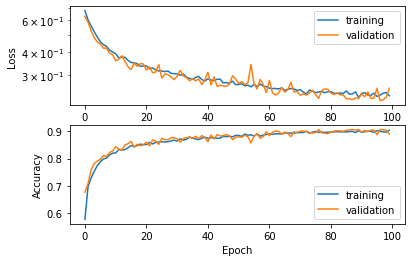



Bird accuracy: 0.946
Unknown accuracy: 0.844


In [6]:
EPOCHS=100
patience=5


steps=256
model_compile()
print("Steps:",steps)


callback=tf.keras.callbacks.EarlyStopping(
    monitor= 'val_accuracy',
    verbose=1,
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    train_generator, 
    validation_data=validation_generator,  
    steps_per_epoch=steps,
    validation_steps=steps,
    epochs=EPOCHS,
    callbacks=[callback]
)
print("\n")
save_model()
print("\n")
plot_accuracy(history)
print("\n")
test_model(1000)

In [7]:
val_loss, val_acc = model.evaluate(validation_generator, verbose=2)

7961/7961 - 186s - loss: 0.2560 - accuracy: 0.8894 - 186s/epoch - 23ms/step


In [8]:
BASE_DIR ="/Users/Jeromey/IOT/project2/data/train/p"

In [9]:
# model = tf.keras.models.load_model(argv[1])
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# with tf.io.gfile.GFile('vww_96_float.tflite', 'wb') as float_file:
#   float_file.write(tflite_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
def representative_dataset_gen():
  dataset_dir = os.path.join(BASE_DIR, "person")
  for idx, image_file in enumerate(os.listdir(dataset_dir)):
    # 10 representative images should be enough for calibration.
    if idx > 10000:
        return
    full_path = os.path.join(dataset_dir, image_file)
    if os.path.isfile(full_path):
      img = tf.keras.preprocessing.image.load_img(
          full_path, color_mode="grayscale").resize((96, 96))
      arr = tf.keras.preprocessing.image.img_to_array(img)
      # Scale input to [0, 1.0] like in training.
      yield [arr.reshape(1, 96, 96, 1)]
      #yield [arr.reshape(1, 96, 96, 1) / 255.] 

# Convert model to full-int8 and save as quantized tflite flatbuffer.
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
quantized_tflite_model = converter.convert()
with tf.io.gfile.GFile('vww_96_int8_norm2.tflite', 'wb') as quantized_file:
    quantized_file.write(quantized_tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmp7iiquxvs\assets


INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmpm9y834_h\assets


INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmpm9y834_h\assets
C:\Users\Jeromey\anaconda3\envs\IOT\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [10]:
fname = 'vww_96_int8t.tflite'
with open(fname, "wb") as fpo:
  num_bytes_written = fpo.write(quantized_tflite_model)
print(f"Wrote {num_bytes_written} / {len(quantized_tflite_model)} bytes to tflite file")

Wrote 91368 / 91368 bytes to tflite file


In [28]:
x1=tf.keras.utils.load_img(
    path='data/train/p/person/35000.jpeg',
    color_mode="grayscale",
    target_size=(IMG_SIZE,IMG_SIZE),
    interpolation='nearest'
)

In [29]:
x2=tf.keras.utils.load_img(
    path='data/train/n/notperson/35000.jpeg',
    color_mode="grayscale",
    target_size=(IMG_SIZE,IMG_SIZE),
    interpolation='nearest'
)

In [30]:
x1_arr=tf.keras.utils.img_to_array(x1)
x1_shape=x1_arr.reshape((1,) +x1_arr.shape)
x1_predict=model.predict(x1_shape)
x1_predict

array([[-2.8527043,  2.887944 ]], dtype=float32)

In [31]:
x2_arr=tf.keras.utils.img_to_array(x2)
x2_shape=x2_arr.reshape((1,) +x2_arr.shape)
x2_predict=model.predict(x2_shape)
x2_predict

array([[ 1.2502034, -1.2574968]], dtype=float32)

In [32]:
label_map = (train_generator.class_indices)

In [27]:
label_map

{'notperson': 0, 'person': 1}

In [33]:
# model = tf.keras.models.load_model(argv[1])
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# with tf.io.gfile.GFile('vww_96_float.tflite', 'wb') as float_file:
#   float_file.write(tflite_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
def representative_dataset_gen():
  dataset_dir = os.path.join(BASE_DIR, "person")
  for idx, image_file in enumerate(os.listdir(dataset_dir)):
    # 10 representative images should be enough for calibration.
    if idx > 10000:
        return
    full_path = os.path.join(dataset_dir, image_file)
    if os.path.isfile(full_path):
      img = tf.keras.preprocessing.image.load_img(
          full_path, color_mode="grayscale").resize((96, 96))
      arr = tf.keras.preprocessing.image.img_to_array(img)
      # Scale input to [0, 1.0] like in training.
      yield [arr.reshape(1, 96, 96, 1)]
      #yield [arr.reshape(1, 96, 96, 1) / 255.] 

# Convert model to full-int8 and save as quantized tflite flatbuffer.
converter.representative_dataset = representative_dataset_gen
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
quantized_tflite_model = converter.convert()
with tf.io.gfile.GFile('vww_96_flaot.tflite', 'wb') as quantized_file:
    quantized_file.write(quantized_tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmpikxlarfn\assets


INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmpikxlarfn\assets


INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmpvee01_ck\assets


INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmpvee01_ck\assets
